In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline
import datetime
from netCDF4 import Dataset # used for the netcdf files which contain lat, lon.
import seaborn as sns

In [13]:
def timestamp(self, filename):
    """
    Returns the numpy datetime 64 [ns] for the current date.
    This is a bit hardcoded at the moment ....
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:14]
    # TODO make sure all filenames have seconds
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr+":"+minuts+":"+sek )

In [14]:
def area_grid_cell(c_lat, d_lat, d_lon):
    """
    c_lon, c_lat : float
        Centre point longitude, latitude in degrees
    d_lat, d_lon : float
        delta lat lon in degrees

    Returns : area in km^2

    cdo : If the grid cell area have to be computed it is scaled with the earth radius to square meters.
    """
    R = 6371000  # in M TO BE COMPARABLE WITH
    # area er egentlig R**2
    area = R*(np.cos((c_lat - d_lat)*np.pi/180) - np.cos((c_lat + d_lat)*np.pi/180) )*(2*d_lon*np.pi/180) # R**2
    return area

In [16]:
centre_era_lat = 30
centre_era_lon = -15

In [19]:
nc_path   = '//uio/lagringshotell/geofag/students/metos/hannasv/satelite_coordinates/'
nc_file  = glob.glob(nc_path + '*.nc')[0]
rootgrp = Dataset(nc_file, "r", format="NETCDF4")
cloud_mask = rootgrp.variables["cloudMask"][:].data
lat_array = rootgrp.variables["lat"][:].data
lon_array = rootgrp.variables["lon"][:].data
lat_array[lat_array < -99] = np.nan # updates of disk values to nan
lon_array[lon_array < -99] = np.nan # updates of disk values to nan
d_phi   = lon_array[:, 1:] - lon_array[:, :-1]
d_theta = lat_array[1:] - lat_array[:-1]

# Padding the axis -- we removed by taking the difference
pad     = np.ones((3712, 1))*np.nan # adding numpy to the axis the values
d_phi   = np.concatenate((pad, d_phi), axis = 1)/2
d_theta = np.concatenate((pad.transpose(), d_theta), axis = 0)/2

# reshapes everything to arrays
d_phi = d_phi.reshape(-1)
d_theta = d_theta.reshape(-1)
longitude = lon_array.reshape(-1)
latitude = lat_array.reshape(-1)

# The indexes of the marked cell with centre inside the era cell
# TODO REDO THIS. Remove the indecies which are in the intersection of inside and out.
# These should be kept in the boundaries and removed from the inside..
idx_centre_inside  = np.intersect1d( np.argwhere( np.abs(longitude - centre_era_lon) < 0.375 ),
                     np.argwhere( np.abs(latitude - centre_era_lat) < 0.375 ) )

era_up_boundary    = centre_era_lat + 0.375
era_down_boundary  = centre_era_lat - 0.375
era_left_boundary  = centre_era_lon + 0.375
era_right_boundary =  centre_era_lon - 0.375

# boundaries of the
cmk_left_boundary  = longitude - d_phi
cmk_right_boundary = longitude + d_phi
cmk_up_boundary    = latitude + d_theta
cmk_down_boundary  = latitude - d_theta

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


In [95]:
# Taking the dfferences of the oposite sides to make sure that they are
# d_left_idx    = era_left_boundary - cmk_right_boundary > 0
# d_right_idx   = cmk_left_boundary - era_right_boundary > 0
#d_down_idx    = era_down_boundary - cmk_up_boundary > 0
#d_up_idx      = cmk_down_boundary - era_up_boundary > 0 

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [100]:
# Taking the dfferences of the oposite sides to make sure that they are
# d_left_idx    = era_left_boundary - cmk_right_boundary > 0
# d_right_idx   = cmk_left_boundary - era_right_boundary > 0
#d_up_idx      = cmk_down_boundary - era_up_boundary > 0 
a = np.intersect1d(np.argwhere(era_down_boundary - cmk_up_boundary > 0), 
                   np.argwhere(cmk_down_boundary - era_up_boundary < 0 ))

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


# If the product is -1 one of the boundaries are on the other side of era boundary

In [149]:
a = np.where(np.sign(cmk_up_boundary - era_down_boundary)*np.sign(-era_up_boundary + cmk_down_boundary) < 0 )

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [148]:
b = np.where(np.sign(era_left_boundary - cmk_right_boundary)*np.sign(-cmk_left_boundary + era_right_boundary) < 0)

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [146]:
(a < 0).sum(), (b < 0).sum() 

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(69012, 73466)

In [150]:
a

(array([10223132, 10226276, 10226845, ..., 10751844, 10751845, 10751846]),)

In [151]:
b

(array([  194797,   198501,   198502, ..., 13576549, 13576550, 13580269]),)

In [119]:
dy_idx = np.intersect1d(np.argwhere(cmk_up_boundary - era_down_boundary > 0), 
                        np.argwhere(era_up_boundary - cmk_down_boundary > 0))

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [ ]:
dx_idx = np.intersect1d(np.argwhere(era_left_boundary - cmk_right_boundary > 0), 
                        np.argwhere(cmk_left_boundary - era_right_boundary > 0))

In [147]:
len(dy_idx)

69012

In [157]:
d_th_A = (cmk_up_boundary[dy_idx] - era_down_boundary)/2
d_th_B = (era_up_boundary - cmk_down_boundary[dy_idx])/2

In [159]:
d_th_A

array([0.03695679, 0.03695679, 0.00979519, ..., 0.39198542, 0.39202118,
       0.39205647])

In [158]:
d_th_B

array([3.99805069e-01, 3.99805069e-01, 4.08860207e-01, ...,
       8.05854797e-05, 4.57763672e-05, 1.04904175e-05])

In [124]:
dist = cmk_up_boundary[dy_idx] - era_down_boundary

In [126]:
dist.max(), dist.min()

(0.8220005035400391, 3.814697265625e-06)

In [187]:
np.sign(cmk_right_boundary - era_left_boundary) * np.sign(era_right_boundary - cmk_left_boundary )

array([nan, nan, nan, ..., nan, nan, nan])

In [180]:
dx_idx = np.intersect1d(np.argwhere(cmk_right_boundary - era_left_boundary > 0), 
                        np.argwhere(era_right_boundary - cmk_left_boundary > 0))

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [181]:
dx_idx

array([], dtype=int64)

In [182]:
d_th_A = (cmk_up_boundary[dy_idx] - era_down_boundary)/2
d_th_B = (era_up_boundary - cmk_down_boundary[dy_idx])/2

In [183]:
d_phi_A = (cmk_right_boundary[dx_idx] - era_left_boundary)/2
d_phi_B = (era_right_boundary - cmk_left_boundary[dx_idx] )/2

In [184]:
d_phi_A

array([], dtype=float64)

In [177]:
d_phi_B

array([], dtype=float64)

In [178]:
corner_idx = np.intersect1d(a, b)

lon_corner = longitude[corner_idx]
lat_corner = latitude[corner_idx]
d_phi      = d_phi[corner_idx]
d_theta    = d_theta[corner_idx]

IndexError: index 10643685 is out of bounds for axis 1 with size 491

In [117]:
#lon_corner

In [114]:
#len(np.intersect1d(a, b)) # Corner

In [112]:
len(a) # 

69012

In [ ]:
len(b)

In [96]:
d_left_idx.sum(), d_right_idx.sum(), d_down_idx.sum(), d_up_idx.sum()

(3568753, 6781923, 8540424, 1667762)

### Detect boundary boxes -- recompute centre

In [49]:
np.min(longitude[d_left]), np.max(longitude[d_left])

(-79.39637, -14.639385)

In [47]:
np.min(latitude[d_left]), np.max(latitude[d_left])

(-80.49831, 80.49831)

In [26]:
# Indexes of the
left_idx   = np.argwhere(d_left  < 0)
right_idx  = np.argwhere(d_right < 0)
up_idx     = np.argwhere(d_up    < 0)
down_idx   = np.argwhere(d_down  < 0)

# Corners are interesting because they should only be computed once
lower_left_idx  = np.intersect1d(left_idx, down_idx)
upper_left_idx  = np.intersect1d(left_idx, up_idx)
lower_right_idx = np.intersect1d(right_idx, down_idx)
upper_right_idx = np.intersect1d(right_idx, up_idx)

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [91]:
np.array([False, True]) + np.array([True, False]) + np.array([True, False])

array([ True,  True])

In [80]:
len(longitude)

13778944

In [ ]:
e_lon = -15
e_lat = 30

In [87]:
dx_left  = (longitude  + d_phi)  - (e_lon - 0.375) 
dx_right = (e_lon + 0.375) - (longitude  - d_phi) 

dy_up    = (30 + 0.375) - (latitude - d_theta)
dy_down  = (latitude + d_theta) - (30 - 0.375)

In [88]:
( np.abs(dx_right) < d_phi).sum()

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


3607

In [86]:
( np.abs(dx_left) < d_phi).sum()

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


3609

In [ ]:
( np.abs(dx_left) < d_phi).sum()

In [ ]:
( np.abs(dx_left) < d_phi).sum()

In [73]:
(np.abs( dy_down ) < 0.375).sum()

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


66515

In [66]:
(np.abs( dx_left ) < 0.375).sum()

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


76843

In [67]:
(np.abs( dx_right ) < 0.375).sum()

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


77234

In [61]:
3712*3712

13778944

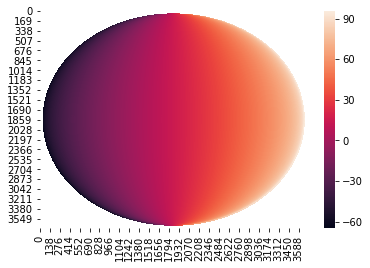

In [55]:
dx_left[dx_left < 0 ]  = 0
dx_right[dx_right < 0] = 0

dy_down[dy_down < 0 ]  = 0
dy_up[dy_up < 0]       = 0

new_d_phi      = ( -dx_left - dx_right + 2*bounds_phi )/2
new_centre_lat = ( -dy_down - dy_up + bound_lats + bounds_theta )/2
new_d_theta    = ( -dy_down - dy_up + 2*bounds_theta )/2

In [27]:
lower_left_idx

array([  202198,   202199,   202200, ..., 10643703, 10643704, 10643705])

In [28]:
lower_right_idx

array([  191147,   191148,   191149, ..., 10662903, 10662904, 10662905])

In [30]:
upper_right_idx

array([10315350, 10319061, 10322772, ..., 13587795, 13587796, 13587797])

In [31]:
upper_left_idx

array([10323373, 10323374, 10327086, ..., 13580267, 13580268, 13580269])

In [34]:
np.intersect1d(right_idx, left_idx)

array([  194797,   198501,   198502, ..., 13576549, 13576550, 13580269])

In [35]:
np.intersect1d(up_idx, down_idx)

array([], dtype=int64)